In [1]:
#Setting up libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading Dataset to the Notebook
# Dataset is from Kaggle

df = pd.read_csv('911.csv')

In [3]:
# Obtaining Info About The Dataset
# From zip column, there are potential null values. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# Showing first five columns of the calls dataset 

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Removing all of the rows with nulltype values.
df.dropna(axis=0, inplace=True)

# resetting index so the indexes make sense 
df.reset_index(inplace=True)

df.drop(columns = "index", inplace=True)

In [6]:
# rechecking such that no nulltype values are present

df.info()

# amount of data is significant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86576 entries, 0 to 86575
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        86576 non-null  float64
 1   lng        86576 non-null  float64
 2   desc       86576 non-null  object 
 3   zip        86576 non-null  float64
 4   title      86576 non-null  object 
 5   timeStamp  86576 non-null  object 
 6   twp        86576 non-null  object 
 7   addr       86576 non-null  object 
 8   e          86576 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 5.9+ MB


In [7]:
# renaming columns for clarity
df.rename(columns={'lat':'latitude', 'lng':'longitude', 'desc':'description', 'twp': 'townships'}, inplace=True)


In [8]:
#checking for edits

df.head()

,latitude,longitude,description,zip,title,timeStamp,townships,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1


In [9]:
# Checking for unique values, if one column only has 1 unique value its useless
current_columns = df.columns

for col in current_columns:
    
    print(f"{col} column has {df[col].nunique()} unique values")

latitude column has 14195 unique values
longitude column has 14204 unique values
description column has 86542 unique values
zip column has 102 unique values
title column has 107 unique values
timeStamp column has 65466 unique values
townships column has 67 unique values
addr column has 19759 unique values
e column has 1 unique values


From the above code, it can be concluded that there is only 1 value from that column. Thus, the data that comes from that column is useless, so the column can be dropped

In [10]:
#dropping the column
df.drop(columns="e", inplace=True)

In [11]:
#Showing first five values
df.head()

,latitude,longitude,description,zip,title,timeStamp,townships,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST


### Answering Basic Questions

######  What are the top 5 zipcodes for 911 calls?

In [12]:
# applying list comprehension
top_zipcodes = [i for i in df['zip'].value_counts(dropna=True).iloc[:5].index]

#Leaderboard Code
print("--- Top Five Zip Codes for 911 Calls ---")

for i in range(len(top_zipcodes)):
    
    print(f"{i+1}.{int(top_zipcodes[i])}")

--- Top Five Zip Codes for 911 Calls ---
1.19401
2.19464
3.19403
4.19446
5.19406


From this query, it can be concluded that the zip code that gets the most 911 is 19401. Fascinating. 

######  What are the top 5 townships for 911 Calls?

In [13]:
# applying same approach as 1.0.1
top_townships = [ts for ts in df['townships'].value_counts().iloc[:5].index]

#Leaderboard Code
print("--- Top Five Townships for 911 Calls ---")

for i in range(len(top_townships)):
    
    print(f"{i+1}.{top_townships[i].lower().title()}")

--- Top Five Townships for 911 Calls ---
1.Lower Merion
2.Abington
3.Norristown
4.Pottstown
5.Cheltenham


From this query, it can be concluded that the townships that get the most 911 calls is Lower Merion. Fascinating

######  From the title codes, what were the unique services that were employed during the accidents/injuries?

In [14]:
#Showing the first 10 values of the title column

df['title'].head(n = 10)

0         EMS: BACK PAINS/INJURY
1        EMS: DIABETIC EMERGENCY
2            Fire: GAS-ODOR/LEAK
3         EMS: CARDIAC EMERGENCY
4               EMS: HEAD INJURY
5           EMS: NAUSEA/VOMITING
6     EMS: RESPIRATORY EMERGENCY
7          EMS: SYNCOPAL EPISODE
8    Traffic: VEHICLE ACCIDENT -
9    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object

In [15]:
print("--- Services Employed ---")

for service in df['title'].str.split(":").apply(lambda x : x[0]).unique():

    print(f"{service}")
    

--- Services Employed ---
EMS
Fire
Traffic


From this query, it can be conclude that the unique service employed for this dataset are EMS, Fire, and Traffic

######  Since there are certain services, as well as reasons to an accident,  which are specified within the datatble, lets create a new service column and reason column to add to the dataset

In [16]:
# Creating Service Column
df['service'] = df['title'].str.split(":").apply(lambda x : x[0])

#Creating Reason Column 
df['reason'] = df['title'].str.split(":").apply(lambda x : x[1])

In [17]:
#Checking Results
df.head()

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY


###### What is the most common reason and least common reason for a 911 Call?  

In [18]:
#Most Common Reason
df['reason'].value_counts().head(n=1).index[0].replace("-", "")

' VEHICLE ACCIDENT '

In [19]:
#Least Common Reason 
df['reason'].value_counts(ascending=True).head(n=1).index[0]

' BOMB DEVICE FOUND'

After querying the most common reason and the least common reason, and it is not surprising that vehicle accidents are the most common reason for a 911 call (in terms of this dataset). Moreover, it is surprising that the least common reason for a 911 call is for finding a bomb device

### Visualizations

##### How frequent was a certain service called upon?

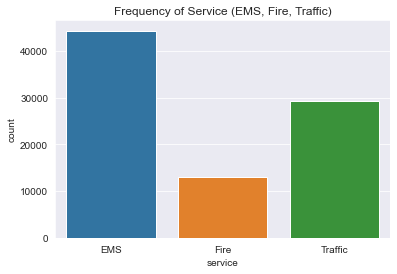

In [20]:
# setting Seaborn Graph Style
sns.set_style("darkgrid")

fig = sns.countplot('service', data=df).set(title="Frequency of Service (EMS, Fire, Traffic)")


From this visualization, it can be concluded that 911 calls heavily involved the EMS Service

###### What was the frequency of services that happened on certain days of the week?

In [21]:
# Obtaining information about the date columns 

df['timeStamp'].apply(lambda x : type(x))

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
86571    <class 'str'>
86572    <class 'str'>
86573    <class 'str'>
86574    <class 'str'>
86575    <class 'str'>
Name: timeStamp, Length: 86576, dtype: object

Since every single date is a string, lets convert these to datetime objects

In [22]:
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))

In [23]:
# verifying this is a datetime object
df['timeStamp'].apply(lambda x: type(x))

0        <class 'pandas._libs.tslibs.timestamps.Timesta...
1        <class 'pandas._libs.tslibs.timestamps.Timesta...
2        <class 'pandas._libs.tslibs.timestamps.Timesta...
3        <class 'pandas._libs.tslibs.timestamps.Timesta...
4        <class 'pandas._libs.tslibs.timestamps.Timesta...
                               ...                        
86571    <class 'pandas._libs.tslibs.timestamps.Timesta...
86572    <class 'pandas._libs.tslibs.timestamps.Timesta...
86573    <class 'pandas._libs.tslibs.timestamps.Timesta...
86574    <class 'pandas._libs.tslibs.timestamps.Timesta...
86575    <class 'pandas._libs.tslibs.timestamps.Timesta...
Name: timeStamp, Length: 86576, dtype: object

In [24]:
# now with datetime objects, access their properties and create hour, month, and day of the week columns

#day of the week column
df['day of the week'] = df['timeStamp'].apply(lambda x : x.second)

#hour column
df['hour'] = df['timeStamp'].apply(lambda x : x.hour)

#month column 
df['month'] = df['timeStamp'].apply(lambda x : x.month)

In [25]:
df.head()

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,0,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,0,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,0,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,1,17,12
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,1,17,12


In [26]:
# days of the week span as 0 - 6 in terms of index, thus mapping the column will have the actual days of the week. 
dmap = {0:'Mon', 1:'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['day of the week'] = df['day of the week'].map(dmap)

In [27]:
df.head() 

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Mon,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Mon,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Mon,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Tues,17,12
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,Tues,17,12


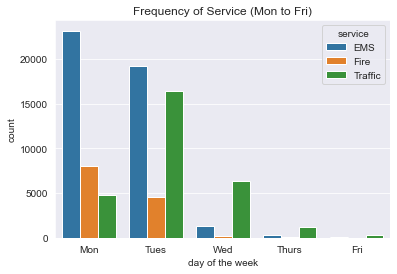

In [28]:
# Now lets apply the visualization 
# Removed Sunday and Saturday because there was no Data Showing.

fig = sns.countplot('day of the week', data=df[(df['day of the week'] != 'Sat') & 
                                               (df['day of the week'] != 'Sun')], 
                                               hue='service').set(title="Frequency of Service (Mon to Fri)")

###### What was the frequency of services that happened on certain months?

In [29]:
# need to remap month into month names
month_names = {
    
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June', 
    7: 'July',
    8: 'August',
    9: 'September', 
    10: 'October',
    11: 'November',
    12: 'December',
}

df['month'] = df['month'].map(month_names)


In [30]:
df.head()

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour,month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Mon,17,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Mon,17,December
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Mon,17,December
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Tues,17,December
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,Tues,17,December


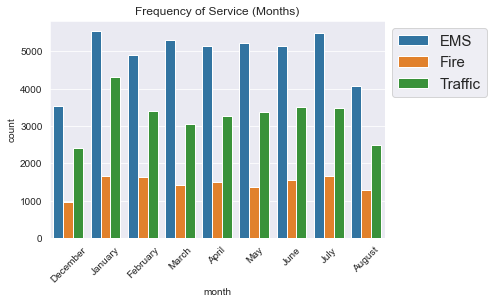

In [31]:
# Then applying the same visualization method
fig = sns.countplot('month', data=df, hue='service').set(title="Frequency of Service (Months)")

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.legend(fontsize = '15', bbox_to_anchor = (1, 1))
plt.show()

From this graph, we can see that the service that was still utilized in these months is still EMS, however the dataset is missing some months.

In [32]:
month_df = df.groupby('month').count()

In [33]:
month_df

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour
month,,,,,,,,,,,,
April,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9857,9893
August,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7563,7829
December,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6855,6898
February,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9876,9926
January,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11485,11511
July,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10559,10624
June,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10151,10203
March,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9685,9753
May,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9895,9939


In [34]:
# re-indexing on a predefined order to match our previous ordering of months

month_df = month_df.reindex(['December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])

In [35]:
month_df 

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour
month,,,,,,,,,,,,
December,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6855,6898
January,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11485,11511
February,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9876,9926
March,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9685,9753
April,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9857,9893
May,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9895,9939
June,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10151,10203
July,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10559,10624
August,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7563,7829


In [36]:
# resetting index so that the months become an actual column 

month_df.reset_index(inplace=True) 

In [37]:
month_df

,month,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour
0,December,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6855,6898
1,January,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11485,11511
2,February,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9876,9926
3,March,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9685,9753
4,April,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9857,9893
5,May,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9895,9939
6,June,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10151,10203
7,July,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10559,10624
8,August,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7563,7829


In [38]:
#Resetting Index
month_df.reset_index(inplace=True)

In [39]:
#Renaming 'index' column to 'month_num'
month_df.rename(columns={"index":"month_num"}, inplace = True)

In [40]:
month_df

,month_num,month,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour
0,0,December,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6855,6898
1,1,January,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11485,11511
2,2,February,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9876,9926
3,3,March,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9685,9753
4,4,April,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9857,9893
5,5,May,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9895,9939
6,6,June,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10151,10203
7,7,July,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10559,10624
8,8,August,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7563,7829


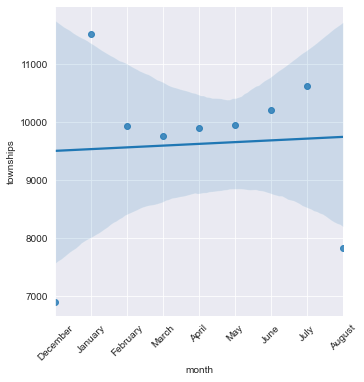

In [41]:
# Linear Regression Plot for how many calls made in a certain month 

ax = sns.lmplot('month_num', 'townships', data=month_df)
ax.set(xticks=month_df['month_num'], xlabel="month")
ax.set_xticklabels(labels=month_df['month'].values)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show() 

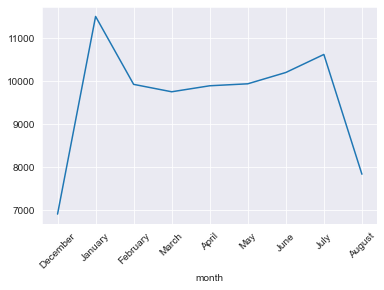

In [42]:
# Line Plot for How Many Calls Made in a certain month

ax = sns.lineplot('month_num', 'latitude', data=month_df)
ax.set(xticks=month_df['month_num'], xlabel='month', ylabel="") 
ax.set_xticklabels(labels=month_df['month'].values)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show() 

######  What was the point in which the most calls were made (including date as well as month)?

In [43]:
#Adding a New Column 'Date'
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [44]:
#Displaying Data
df.head()

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour,month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Mon,17,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Mon,17,December,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Mon,17,December,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Tues,17,December,2015-12-10
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,Tues,17,December,2015-12-10


In [45]:
date_df = df.groupby('Date').count()

In [46]:
#Displaying Data
date_df

,latitude,longitude,description,zip,title,timeStamp,townships,addr,service,reason,day of the week,hour,month
Date,,,,,,,,,,,,,
2015-12-10,99,99,99,99,99,99,99,99,99,99,95,99,99
2015-12-11,332,332,332,332,332,332,332,332,332,332,331,332,332
2015-12-12,333,333,333,333,333,333,333,333,333,333,330,333,333
2015-12-13,280,280,280,280,280,280,280,280,280,280,272,280,280
2015-12-14,386,386,386,386,386,386,386,386,386,386,386,386,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,279,279,279,279,279,279,279,279,279,279,271,279,279
2016-08-21,299,299,299,299,299,299,299,299,299,299,281,299,299
2016-08-22,336,336,336,336,336,336,336,336,336,336,298,336,336


In [47]:
#Taking only the latitude data to graph because all of the coumn data is the same anyway
date_vector = date_df.copy()['latitude']

In [48]:
#Displaying Vector
date_vector

Date
2015-12-10     99
2015-12-11    332
2015-12-12    333
2015-12-13    280
2015-12-14    386
             ... 
2016-08-20    279
2016-08-21    299
2016-08-22    336
2016-08-23    390
2016-08-24    106
Name: latitude, Length: 259, dtype: int64

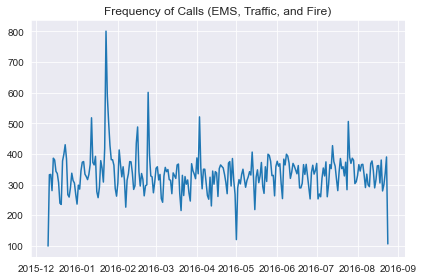

In [49]:
#PLotting the Data
plt.plot(date_vector.index, date_vector.values)
plt.title("Frequency of Calls (EMS, Traffic, and Fire)")
plt.tight_layout()
plt.show()

######  What was the point in which the most calls were made for a certain service? (including date as well as month)?

In [50]:
#Setting Up The Data
traffic_df = df[df['service'] == 'Traffic'].groupby('Date').count()['townships']
ems_df = df[df['service'] == 'EMS'].groupby('Date').count()['townships']
fire_df = df[df['service'] == 'Fire'].groupby('Date').count()['townships']

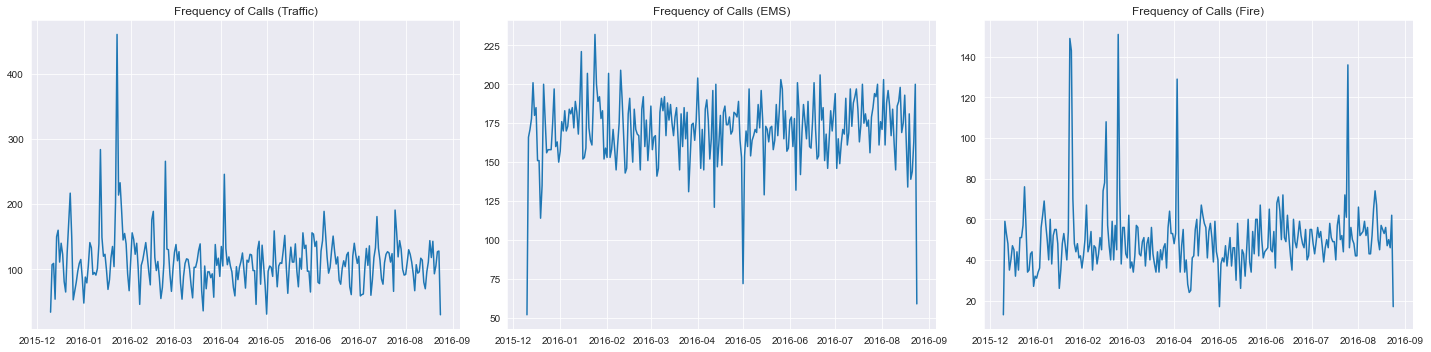

In [51]:
#Plotting the Data
fig, axes = plt.subplots(1, 3, figsize=(20,5))

axes[0].plot(traffic_df.index, traffic_df.values)
axes[0].set_title('Frequency of Calls (Traffic)')
axes[1].plot(ems_df.index, ems_df.values)
axes[1].set_title('Frequency of Calls (EMS)')
axes[2].plot(fire_df.index, fire_df.values)
axes[2].set_title('Frequency of Calls (Fire)')

plt.tight_layout()

###### What are the days where the most calls were made regardless of service?

In [52]:
#Adjusting the hour index into columns
cluster = df.groupby(['hour','day of the week']).count().unstack(level=0)['latitude']

# Removing Nonetype Values
cluster.dropna(inplace=True)

In [53]:
cluster

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of the week,,,,,,,,,,,,,,,,,,,,,
Fri,3.0,3.0,2.0,2.0,1.0,2.0,4.0,9.0,16.0,21.0,...,29.0,34.0,36.0,32.0,38.0,16.0,19.0,18.0,10.0,3.0
Mon,1003.0,834.0,805.0,789.0,789.0,837.0,1180.0,1556.0,1783.0,1933.0,...,1905.0,1851.0,1832.0,1930.0,1765.0,1763.0,1660.0,1532.0,1373.0,1141.0
Thurs,11.0,8.0,6.0,5.0,9.0,2.0,2.0,31.0,63.0,86.0,...,110.0,141.0,141.0,126.0,106.0,79.0,54.0,41.0,27.0,20.0
Tues,782.0,634.0,513.0,434.0,439.0,522.0,873.0,1578.0,2139.0,2131.0,...,2535.0,2573.0,2691.0,2717.0,2421.0,1986.0,1757.0,1493.0,1271.0,977.0
Wed,59.0,40.0,22.0,16.0,9.0,26.0,45.0,233.0,335.0,440.0,...,587.0,645.0,732.0,713.0,581.0,405.0,312.0,229.0,175.0,82.0


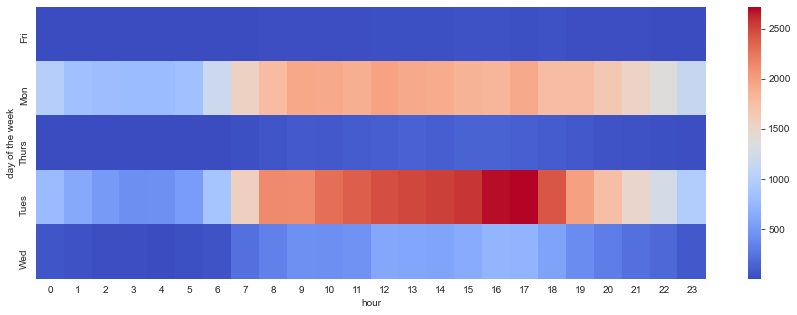

In [54]:
#Plotting a heatmap for the hour & day of the week data
fig = plt.figure(figsize = (15,5))
sns.heatmap(cluster, cmap='coolwarm')
plt.show()

<Figure size 1080x360 with 0 Axes>

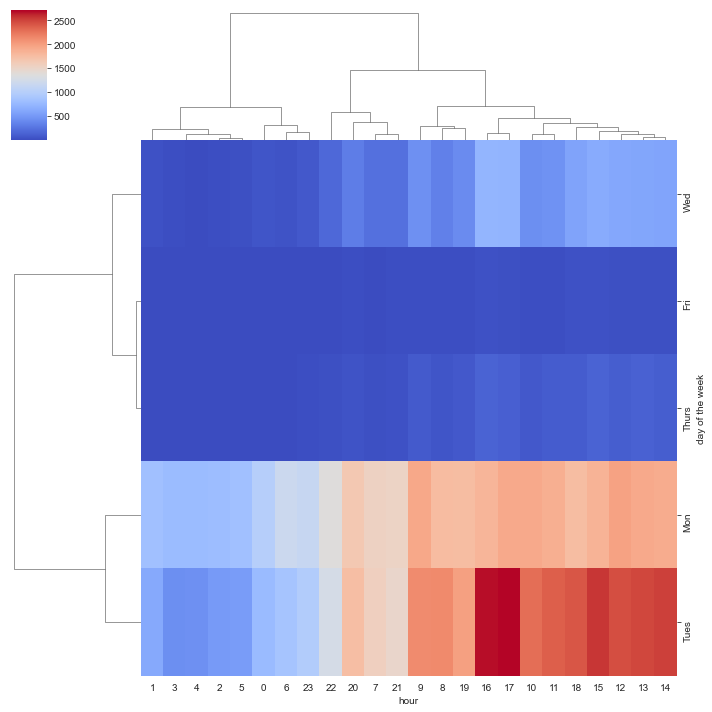

In [55]:
#Plotting a clustermap for the hour & day of the week data
fig = plt.figure(figsize = (15,5))
sns.clustermap(cluster, cmap='coolwarm')
plt.show()

In [56]:
#Adjusting the month index into columns
month_cluster = df.groupby(['month','day of the week']).count().unstack(level=0)['latitude']

# Removing Nonetype Values
month_cluster.dropna(inplace=True)

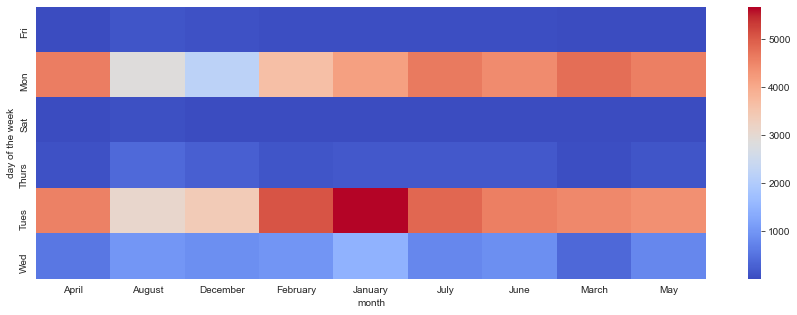

In [57]:
#Plotting a heatmap for the month & day of the week data
fig = plt.figure(figsize = (15,5))
sns.heatmap(month_cluster, cmap='coolwarm')
plt.show()

<Figure size 1080x360 with 0 Axes>

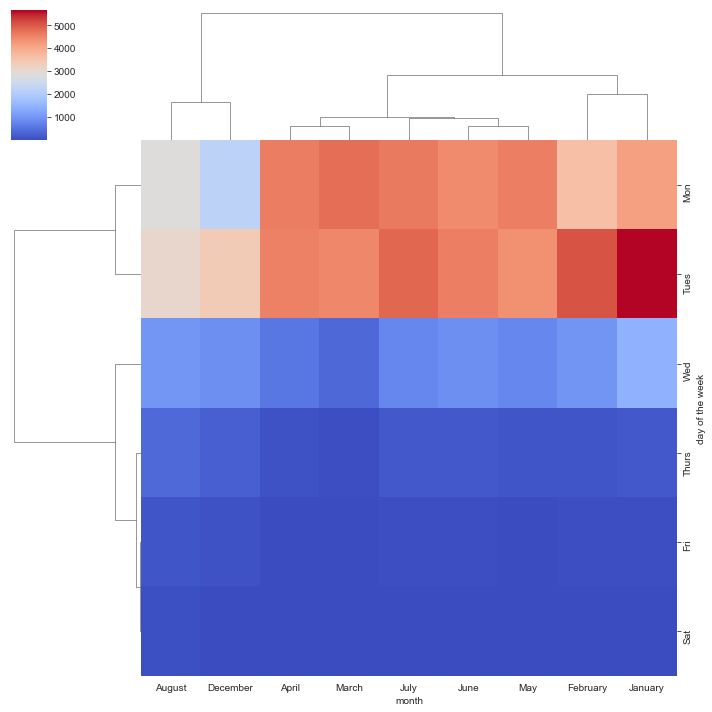

In [58]:
#Plotting a clustermap for the month & day of the week data
fig = plt.figure(figsize = (15,5))
sns.clustermap(month_cluster, cmap='coolwarm')
plt.show()

From the clustermap and heatmap graphs, Monday and Tuesday were the days in which the most calls were made